# Automatically Masking Cartridge Case Images

**Abstract**

The manual masking of fired cartridge cases, a critical function in forensic ballistics, is a process that has traditionally been time-consuming and prone to human error. To address these challenges, this report introduces a novel algorithm designed to automate the masking and coloring of cartridge case images. This automation is particularly vital for sorting and comparing cases to determine their firearm origins, a task of paramount importance in police investigations.

**Introduction**

The examination of cartridge cases plays a vital role in forensic investigations involving firearms. Features such as breech-face impressions and firing pin impressions are unique to each weapon and can connect a piece of ammunition to its firearm origin. The precise masking of these features on cartridge case images allows forensic software to more effectively identify and compare these distinctive characteristics. The automation of this process presents an opportunity to significantly accelerate investigative workflows and enhance the accuracy of forensic analyses.

**Methodology**

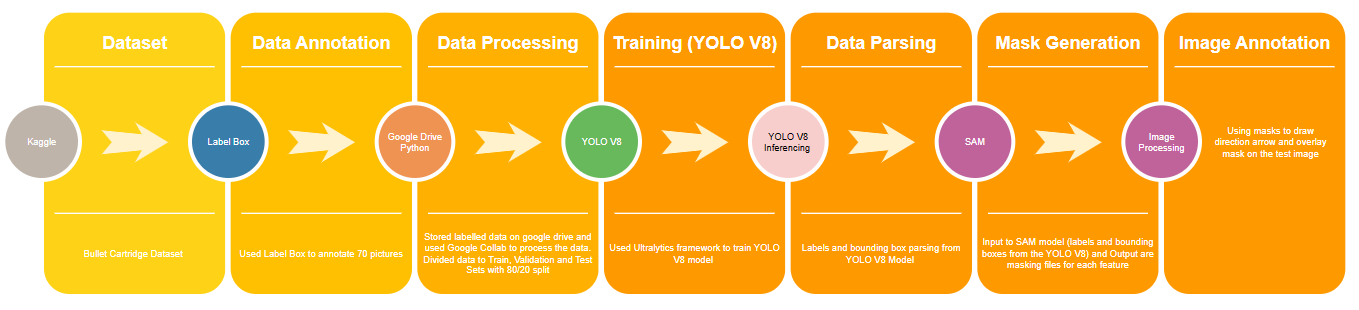
The developed algorithm employs a composite machine learning approach, integrating the strengths of YOLO V8 for object detection and the Segment Anything Model (SAM) for image segmentation. YOLO V8, renowned for its efficiency and accuracy in detecting objects within images, was fine-tuned to recognize specific features on cartridge cases. This fine-tuning involved training the model to identify different feature categories relevant to forensic analysis, including breech-face impressions, aperture shears, firing pin impressions, firing pin drags, and the direction of the firing pin drag. Once these features were detected and their respective bounding boxes were established, the SAM utilized this information to create segmented masks corresponding to each feature.

A dataset from Kaggle, consisting of 9mm cartridge case images, was annotated using Label box to delineate the features of interest. Given the constraints on resources and time, a subset of 70 images underwent annotation, serving as a training set for YOLO V8. Despite the limited dataset, YOLO V8's robust learning algorithms were able to yield promising results, demonstrating the model's potential for one-shot learning and its applicability in scenarios with sparse data.

**Results**

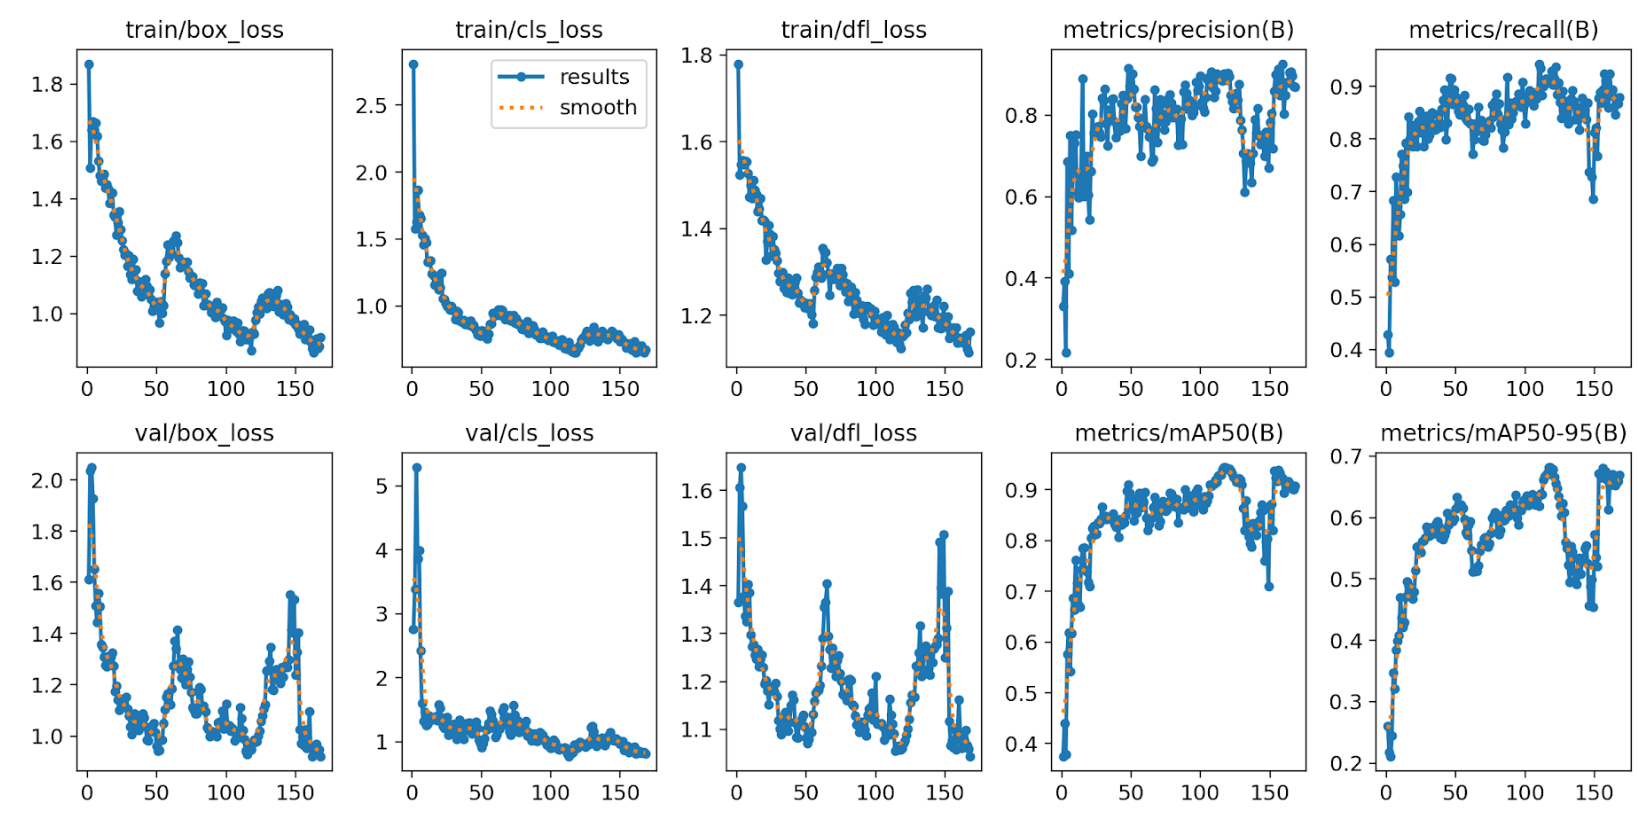

The training process of the YOLO V8 model for the automated masking algorithm reveals a robust learning pattern. The losses, including box loss, class loss, and direction of firing pin drag (dfI_loss), exhibit a downward trend as training progresses, indicative of the model’s improving accuracy in feature localization and classification. The training box loss stabilizes around 1.0, while the validation box loss converges similarly, suggesting good generalization to the validation set.

Precision and recall metrics, which are crucial indicators of the model's performance, show strong results. Precision remains consistently above 0.8, and recall trends towards 0.9, indicating that the model is highly accurate in identifying relevant features and that it retrieves most of the positive samples. The mean Average Precision (mAP) at Intersection over Union (IoU) of 0.5 (mAP50) is maintained above 0.6 throughout the training, which, combined with an mAP at IoU of 0.5 to 0.95 (mAP50-95) above 0.5, validates the model's robustness across different thresholds of IoU.

**Discussion**

The training and validation losses present a compelling narrative about the model's capacity to learn and adapt to the task of identifying and masking features on cartridge cases. The convergence of training and validation losses implies that the model is not overfitting and is expected to perform well on unseen data.

The high precision metric is particularly significant, as it indicates a low false positive rate — an essential factor in forensic analysis where the cost of misidentification is high. The high recall metric suggests that the model has a low false negative rate, which is equally important in ensuring that no critical evidence is missed.

The mAP scores are benchmarks for the overall quality of the model across all classes and IoU thresholds. An mAP50 above 0.6 signifies that the model is highly accurate when the IoU threshold is 0.5, a common benchmark in object detection tasks. The mAP50-95, which averages mAP across IoU thresholds from 0.5 to 0.95, being above 0.5, indicates that the model is robust even when stricter localization criteria are applied. This is particularly useful in forensic applications where the precise delineation of features is necessary.

The observed metrics demonstrate that the algorithm is robust and reliable, making it a suitable candidate for automating the task of masking cartridge cases in a forensic setting. The performance could potentially be improved even further by expanding the training dataset and continuing to refine the model parameters.

In conclusion, the algorithm exhibits a strong capability for accurately identifying and masking the pertinent features of cartridge cases. Its implementation in a forensic context could significantly streamline the analysis process, offering not only time savings but also enhancing the reliability of the results which are critical for police investigations.

**Conclusion**

The implementation of an automated masking algorithm represents a significant technological advancement in the field of forensic ballistics. By harnessing the capabilities of advanced machine learning models, the algorithm facilitates the rapid and accurate analysis of cartridge cases, which is essential for the timely resolution of police investigations. As the algorithm continues to evolve through further research and development, it holds the promise of becoming a standard tool in forensic laboratories worldwide, offering a high degree of reliability and efficiency in ballistic examinations.

**References**

"Kaggle Dataset for Bullet Cartridges." Kaggle. [Online]. Available: https://www.kaggle.com/datasets/dnnpy1/tracks-on-bullet-cartridges

"Labelbox: Open Source Labeling Tool." Labelbox. [Online]. Available: https://labelbox.com/

"YOLOv8: Train Custom Data." Ultralytics. [Online]. Available: https://docs.ultralytics.com/modes/train/

"Segment Anything Model (SAM) GitHub Repository." [Online]. Available: https://github.com/facebookresearch/segment-anything


**Output of YOLO V8 Model**

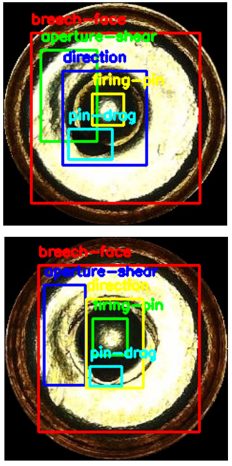

**Output of SAM - Masking Model**

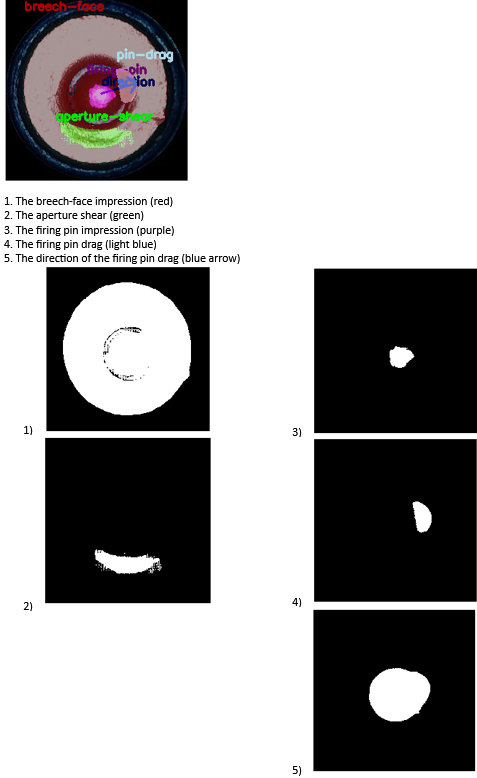

## Install Required Packages

In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 701.5/701.5 kB 3.7 MB/s eta 0:00:00


In [2]:
!pip install git+https://github.com/facebookresearch/segment-anything.git

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-m_94ihxr
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-m_94ihxr
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36587 sha256=6d608b3431fbbffad177813cd97fac7903f9a7a983e63dc8cd9a30034b9916ab
  Stored in directory: /tmp/pip-ephem-wheel-cache-gen1kds7/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment-anything


In [3]:
!pip install opencv-python pycocotools matplotlib onnxruntime onnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 43.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 12.5 MB/s eta 0:00:00


In [4]:
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

--2024-01-22 16:54:48--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.173.166.48, 18.173.166.31, 18.173.166.74, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.173.166.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘sam_vit_h_4b8939.pth’

sam_vit_h_4b8939.pt 100%[===================>]   2.39G   117MB/s    in 26s     

2024-01-22 16:55:14 (95.0 MB/s) - ‘sam_vit_h_4b8939.pth’ saved [2564550879/2564550879]



In [5]:
## importing required libraries
import os
import shutil
import random

!pip install tqdm --upgrade
from tqdm.notebook import tqdm

import ultralytics
ultralytics.checks()

from ultralytics import YOLO
import numpy as np
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image

from segment_anything import SamPredictor, sam_model_registry, SamAutomaticMaskGenerator

Ultralytics YOLOv8.1.4 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.8/78.2 GB disk)


## Creating train-val split

In [6]:
## connecting to the google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
train_path_img = "./yolov8_train_test/images/train/"
train_path_label = "./yolov8_train_test/labels/train/"
val_path_img = "./yolov8_train_test/images/val/"
val_path_label = "./yolov8_train_test/labels/val/"
test_path = "./yolov8_train_test/test"

In [8]:
'''
Split the dataset into train and test and creates the train.txt and test.tx with
the respective path of the images in each folder
'''

def train_test_split(path,neg_path=None, split = 0.2):
    print("------ PROCESS STARTED -------")


    files = list(set([name[:-4] for name in os.listdir(path)])) ## removing duplicate names i.e. counting only number of images


    print (f"--- This folder has a total number of {len(files)} images---")
    random.seed(42)
    random.shuffle(files)

    test_size = int(len(files) * split)
    train_size = len(files) - test_size

    ## creating required directories

    os.makedirs(train_path_img, exist_ok = True)
    os.makedirs(train_path_label, exist_ok = True)
    os.makedirs(val_path_img, exist_ok = True)
    os.makedirs(val_path_label, exist_ok = True)


    ### ----------- copying images to train folder
    for filex in tqdm(files[:train_size]):
      if filex == 'classes':
          continue
      shutil.copy2(path + filex + '.jpg',f"{train_path_img}/" + filex + '.jpg' )
      shutil.copy2(path + filex + '.txt', f"{train_path_label}/" + filex + '.txt')



    print(f"------ Training data created with 90% split {len(files[:train_size])} images -------")

    if neg_path:
        neg_images = list(set([name[:-4] for name in os.listdir(neg_path)])) ## removing duplicate names i.e. counting only number of images
        for filex in tqdm(neg_images):
            shutil.copy2(neg_path+filex+ ".jpg", f"{train_path_img}/" + filex + '.jpg')

        print(f"------ Total  {len(neg_images)} negative images added to the training data -------")

        print(f"------ TOTAL Training data created with {len(files[:train_size]) + len(neg_images)} images -------")



    ### copy images to validation folder
    for filex in tqdm(files[train_size:]):
      if filex == 'classes':
          continue
      # print("running")
      shutil.copy2(path + filex + '.jpg', f"{val_path_img}/" + filex + '.jpg' )
      shutil.copy2(path + filex + '.txt', f"{val_path_label}/" + filex + '.txt')

    print(f"------ Testing data created with a total of {len(files[train_size:])} images ----------")

    print("------ TASK COMPLETED -------")

### for label_tag
train_test_split('/content/drive/MyDrive/yolov8_train_test/data/') ### without negative images


------ PROCESS STARTED -------
--- This folder has a total number of 70 images---


  0%|          | 0/56 [00:00<?, ?it/s]

------ Training data created with 90% split 56 images -------


  0%|          | 0/14 [00:00<?, ?it/s]

------ Testing data created with a total of 14 images ----------
------ TASK COMPLETED -------


## Training: YOLO V8 Model to learn all differnet features of the bullet cartridge

In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/drive/MyDrive/yolov8_train_test/dataset.yaml epochs=2000 imgsz=237 batch=1 project=/content/drive/MyDrive/yolov8_train_test/training_results name=bullet

Ultralytics YOLOv8.1.3 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/yolov8_train_test/dataset.yaml, epochs=2000, time=None, patience=50, batch=1, imgsz=237, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/yolov8_train_test/training_results, name=bullet7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt

## Inferencing: Predicting bounding boxes by YOLO V8 and then using SAM to draw the masking for each class

In [15]:
#Mapping of class IDs to class names
class_names = {1:'breech-face',0:'aperture-shear',3:'firing-pin',4:'pin-drag',2:'direction'}

# Function to load model
def load_model(model_path):
    # Load the model
    model = YOLO(model_path)
    return model

# Function to process an image and get predictions
def process_image(model, image_path):
    # Load image
    image = Image.open(image_path)
    #image = np.array(image)

    # Inference
    results = model.predict(source=image,
                    conf=0.05,
                    imgsz=237,
                    max_det = 20,
                    classes = [0,1,2,3,4],
                    save=True,
                    save_txt=True,
                    save_conf=True,
                    show_labels = True,
                    show_boxes=True,
                    show_conf = False)


    # Filter predictions to get the best for each class

    for result in results:
        boxes = result.boxes
    best_predictions = {}
    print(boxes)
    for x1, y1, x2, y2, conf, cls in boxes.data:
        cls = cls.item()  # Convert to a standard Python number (integer)

        if cls not in best_predictions or conf.item() > best_predictions[cls][4]:
            best_predictions[cls] = (x1.item(), y1.item(), x2.item(), y2.item(), conf.item())
    return best_predictions, boxes

# function to plot bounding boxes
def plot_bboxes(image_path, predictions):
    # Load image
    image_path_str = str(image_path)
    image = cv2.imread(image_path_str)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Define a list of colors (in RGB)
    colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0), (0, 255, 255)]

    # Plot each bounding box
    for idx, (cls_id, (x1, y1, x2, y2, conf)) in enumerate(predictions.items()):
        # Choose a color for each class
        color = colors[idx % len(colors)]

        # Define the start and end points of the rectangle
        start_point = (int(x1), int(y1))
        end_point = (int(x2), int(y2))
        thickness = 2
        image = cv2.rectangle(image, start_point, end_point, color, thickness)

        # Map class ID to class name
        class_name = class_names.get(cls_id, 'Unknown')

        # Put class name on the bounding box
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 0.5
        font_color = color  # Use the same color for text
        line_type = 2
        cv2.putText(image, class_name, (int(x1), int(y1) - 10), font, font_scale, font_color, line_type)

    # Display the image
    plt.imshow(image)
    plt.axis('off')
    plt.show()


WARNING ⚠️ imgsz=[237] must be multiple of max stride 32, updating to [256]
0: 256x256 11 breech-faces, 1 aperture-shear, 2 firing-pins, 1 pin-drag, 1 direction, 8.9ms
Speed: 2.1ms preprocess, 8.9ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 256)
Results saved to runs/detect/predict2
1 label saved to runs/detect/predict2/labels
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([1., 2., 3., 0., 4., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0.], device='cuda:0')
conf: tensor([1.0000, 0.8896, 0.8248, 0.7494, 0.6785, 0.4151, 0.4061, 0.2182, 0.1828, 0.1489, 0.1242, 0.1042, 0.0945, 0.0931, 0.0889, 0.0838], device='cuda:0')
data: tensor([[2.3044e+01, 2.4451e+01, 2.0327e+02, 2.0926e+02, 9.9996e-01, 1.0000e+00],
        [7.3686e+01, 8.1847e+01, 1.7087e+02, 1.5530e+02, 8.8960e-01, 2.0000e+00],
        [1.0039e+02, 1.0327e+02, 1.3717e+02, 1.3847e+02, 8.2485e-01, 3.0000e+00],
        [6.2947e+01, 1.6197e+02, 1.6613e+02, 1.9010e+02, 7.4937e-01, 0.0000e+00],
     

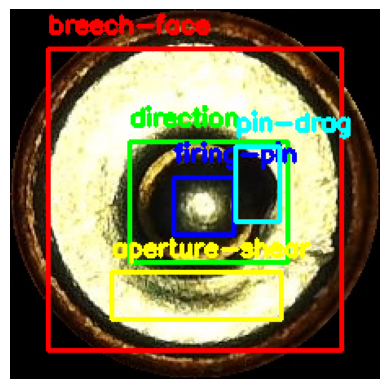


WARNING ⚠️ imgsz=[237] must be multiple of max stride 32, updating to [256]
0: 256x256 5 breech-faces, 1 aperture-shear, 2 firing-pins, 1 pin-drag, 1 direction, 9.9ms
Speed: 1.1ms preprocess, 9.9ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 256)
Results saved to runs/detect/predict2
2 labels saved to runs/detect/predict2/labels
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([1., 2., 0., 4., 3., 0., 0., 2., 0., 0.], device='cuda:0')
conf: tensor([0.9994, 0.9149, 0.8482, 0.7913, 0.7810, 0.4637, 0.0953, 0.0757, 0.0537, 0.0534], device='cuda:0')
data: tensor([[2.8967e+01, 3.0360e+01, 2.0892e+02, 2.1135e+02, 9.9936e-01, 1.0000e+00],
        [1.0013e+02, 6.5706e+01, 1.4828e+02, 1.5974e+02, 9.1491e-01, 2.0000e+00],
        [1.4712e+02, 8.5595e+01, 1.9306e+02, 1.8389e+02, 8.4821e-01, 0.0000e+00],
        [1.0051e+02, 6.5761e+01, 1.4767e+02, 8.9808e+01, 7.9127e-01, 4.0000e+00],
        [1.1010e+02, 1.0249e+02, 1.4167e+02, 1.3846e+02, 7.8102e-01, 3.0000e+

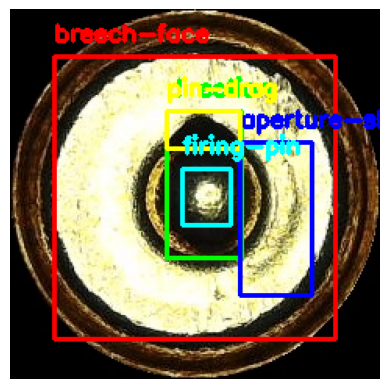


WARNING ⚠️ imgsz=[237] must be multiple of max stride 32, updating to [256]
0: 256x256 2 breech-faces, 1 aperture-shear, 1 firing-pin, 2 pin-drags, 1 direction, 9.4ms
Speed: 1.1ms preprocess, 9.4ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 256)
Results saved to runs/detect/predict2
3 labels saved to runs/detect/predict2/labels
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([1., 0., 2., 3., 4., 3., 0.], device='cuda:0')
conf: tensor([0.9860, 0.9253, 0.9038, 0.8287, 0.8160, 0.1277, 0.0881], device='cuda:0')
data: tensor([[2.9114e+01, 3.2384e+01, 2.0664e+02, 2.1150e+02, 9.8599e-01, 1.0000e+00],
        [3.9742e+01, 5.0150e+01, 9.8616e+01, 1.4605e+02, 9.2534e-01, 0.0000e+00],
        [6.2609e+01, 7.2223e+01, 1.5015e+02, 1.7128e+02, 9.0385e-01, 2.0000e+00],
        [9.3446e+01, 9.6319e+01, 1.2618e+02, 1.2968e+02, 8.2869e-01, 3.0000e+00],
        [6.8949e+01, 1.3321e+02, 1.1474e+02, 1.6537e+02, 8.1596e-01, 4.0000e+00],
        [6.7052e+01, 7.6830e+01

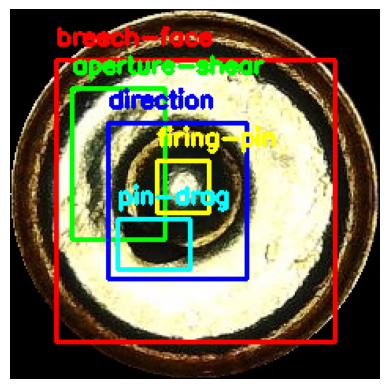


WARNING ⚠️ imgsz=[237] must be multiple of max stride 32, updating to [256]
0: 256x256 2 breech-faces, 1 aperture-shear, 2 firing-pins, 2 pin-drags, 1 direction, 10.2ms
Speed: 1.0ms preprocess, 10.2ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 256)
Results saved to runs/detect/predict2
4 labels saved to runs/detect/predict2/labels
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([1., 3., 0., 2., 4., 0., 3., 2.], device='cuda:0')
conf: tensor([0.9712, 0.8171, 0.7208, 0.6720, 0.4958, 0.1001, 0.0827, 0.0658], device='cuda:0')
data: tensor([[3.6357e+01, 3.0198e+01, 2.0821e+02, 2.0866e+02, 9.7121e-01, 1.0000e+00],
        [9.4857e+01, 8.7381e+01, 1.3185e+02, 1.2633e+02, 8.1710e-01, 3.0000e+00],
        [4.2247e+01, 5.1295e+01, 8.6992e+01, 1.5876e+02, 7.2076e-01, 0.0000e+00],
        [8.7119e+01, 6.6117e+01, 1.4805e+02, 1.6139e+02, 6.7205e-01, 2.0000e+00],
        [9.1291e+01, 1.3826e+02, 1.2501e+02, 1.5949e+02, 4.9581e-01, 4.0000e+00],
        [3.8899e

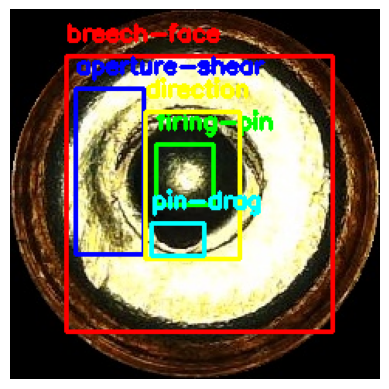


WARNING ⚠️ imgsz=[237] must be multiple of max stride 32, updating to [256]
0: 256x256 1 breech-face, 1 aperture-shear, 2 firing-pins, 1 pin-drag, 1 direction, 13.2ms
Speed: 1.8ms preprocess, 13.2ms inference, 2.5ms postprocess per image at shape (1, 3, 256, 256)
Results saved to runs/detect/predict2
5 labels saved to runs/detect/predict2/labels
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([1., 3., 2., 4., 0., 2.], device='cuda:0')
conf: tensor([0.9946, 0.8449, 0.7948, 0.6316, 0.5605, 0.2094], device='cuda:0')
data: tensor([[ 28.4380,  29.2008, 204.0657, 204.0026,   0.9946,   1.0000],
        [108.2177,  88.9336, 145.1280, 125.4246,   0.8449,   3.0000],
        [ 83.2035,  63.8226, 169.2473, 131.6712,   0.7948,   2.0000],
        [ 90.2626,  66.7434, 110.1300,  85.4809,   0.6316,   4.0000],
        [115.0911,  44.3321, 186.1424, 112.5998,   0.5605,   0.0000],
        [ 77.4683,  60.2798, 165.6949, 161.1873,   0.2094,   2.0000]], device='cuda:0')
id: None
is_tr

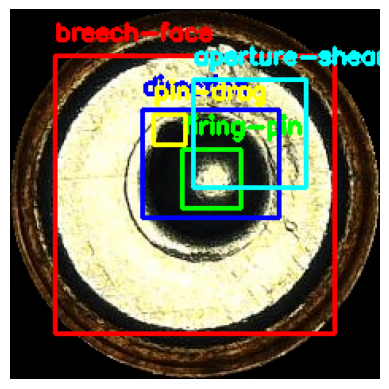

In [14]:
# Load your model
model_path = '/content/drive/MyDrive/yolov8_train_test/training_results/bullet7/weights/best.pt'
model = load_model(model_path)
boxes1 = []
# Directory containing the images
image_dir = Path('/content/drive/MyDrive/yolov8_train_test/test_images')

# Process each image in the directory
for image_path in image_dir.glob('*.jpg'):
    best_preds, boxes = process_image(model, image_path)
    boxes1.append(boxes)
    plot_bboxes(image_path, best_preds)

!cp -r /content/runs/detect/predict /content/drive/MyDrive/yolov8_train_test/output

## Loading Segment Anything Model to plot masks over the predicted bounding boxes by the YOLO V8 model

In [16]:
sam_checkpoint = "/content/sam_vit_h_4b8939.pth"
model_type = "vit_h"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
predictor = SamPredictor(sam)

In [17]:
# Mapping of class IDs to class names

class_names = {1:'breech-face',0:'aperture-shear',3:'firing-pin',4:'pin-drag',2:'direction'}

colors = {
    1: (255, 0, 0),      # Red
    0: (0, 255, 0),      # Green
    3: (128, 0, 128),    # Purple
    4: (173, 216, 230),  # Light blue
    2: (0, 0, 128)       # Navy blue
}

#creating folder to output predicted results
output_folder = Path('/content/output')
output_folder.mkdir(parents=True, exist_ok=True)

In [18]:
# Process each image in the test directory
h = (list(range (0,5))) # number of pictures in test folder
for image_path, p in zip(image_dir.glob('*.jpg'), h):
    best_boxes = {}
    for *xyxy, conf, cls in zip(boxes1[p].xyxy, boxes1[p].conf,boxes1[p].cls):
        cls = int(cls.item())
        if cls in class_names and (cls not in best_boxes or conf.item() > best_boxes[cls][1]):
            best_boxes[cls] = (xyxy, conf.item())

    image = cv2.imread(str(image_path))
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    predictor.set_image(image_rgb)

    # Initialize a masked image
    masked_image = image.copy()

    for cls, (bbox, _) in best_boxes.items():
        # Convert each tensor in bbox to numpy
        input_box1 = np.array([coord.cpu().numpy() for coord in bbox])
        input_box = np.array(input_box1.flatten())

        try:
            print('class ',cls)
            print('box ',input_box)

            masks, _, _ = predictor.predict(
                point_coords=None,
                point_labels=None,
                box=input_box[None, :],
                multimask_output=False,
            )

            for mask in masks:
                mask_image = (mask * 255).astype(np.uint8)
                cv2.imwrite(str(output_folder / f'mask_class_{int(cls)}_{image_path.stem}.png'), mask_image)

                color_mask = np.zeros_like(image_rgb)
                color_mask[mask > 0.5] = colors[int(cls)]

                if cls != 2:
                    # Overlay mask
                    masked_image = cv2.addWeighted(masked_image, 0.9, color_mask, 0.5, 0)

                    # Add class name
                    cv2.putText(masked_image, class_names[int(cls)], (int(input_box[0]), int(input_box[1]) - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, colors[int(cls)], 2)

                if cls == 3:
                    # Overlay mask
                    masked_image = cv2.addWeighted(masked_image, 0.9, color_mask, 0.9, 0)

                    # Add class name
                    cv2.putText(masked_image, class_names[int(cls)], (int(input_box[0]), int(input_box[1]) - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, colors[int(cls)], 2)

                if cls == 2:  # adding arrow direction of the fired pin
                    # Find contours of the mask
                    contours, _ = cv2.findContours(mask_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                    contour = max(contours, key=cv2.contourArea)

                    # Calculate the centroid of the shape
                    M = cv2.moments(contour)
                    if M["m00"] != 0:
                        cX = int(M["m10"] / M["m00"])
                        cY = int(M["m01"] / M["m00"])
                    else:
                        # Default to center of the image if contour is empty (prevent div by 0)
                        cX, cY = mask_image.shape[1] // 2, mask_image.shape[0] // 2

                    # Find the farthest point on the contour from the centroid
                    farthest_point = max(contour, key=lambda point: cv2.norm((cX, cY) - point[0]))
                    farthest_point = tuple(farthest_point[0])

                    # Draw an arrow from the centroid to the farthest point on the mask
                    cv2.arrowedLine(masked_image, (cX, cY), farthest_point, (0, 0, 128), 2, tipLength=0.3)

                    # Add class name for class 2
                    cv2.putText(masked_image, class_names[cls], (cX, cY - 10),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 120), 2)
        except:
            pass
     # Save the final image with all masks and class names
    final_image_file = output_folder / f'masked_image_{image_path.stem}.png'
    cv2.imwrite(str(final_image_file), cv2.cvtColor(masked_image, cv2.COLOR_RGB2BGR))

class  1
box  [     23.044      24.451      203.27      209.26]
class  2
box  [     73.686      81.847      170.87       155.3]
class  3
box  [     100.39      103.27      137.17      138.47]
class  0
box  [     62.947      161.97      166.13       190.1]
class  4
box  [     138.08      84.135      165.43      130.61]
class  1
box  [     28.967       30.36      208.92      211.35]
class  2
box  [     100.13      65.706      148.28      159.74]
class  0
box  [     147.12      85.595      193.06      183.89]
class  4
box  [     100.51      65.761      147.67      89.808]
class  3
box  [      110.1      102.49      141.67      138.46]
class  1
box  [     29.114      32.384      206.64       211.5]
class  0
box  [     39.742       50.15      98.616      146.05]
class  2
box  [     62.609      72.223      150.15      171.28]
class  3
box  [     93.446      96.319      126.18      129.68]
class  4
box  [     68.949      133.21      114.74      165.37]
class  1
box  [     36.357      30.198  

In [19]:
!cp -r /content/output /content/drive/MyDrive/yolov8_train_test/output